# <u>WAZE PROJECT</u>  
### FIRST OBJECTIVE:  
Conduct A T-Test To Analyze The Difference In The Mean Amount Of Rides Between Android Users And iPhone Users  

### SECOND OBJECTIVE:  
Build A Logistic Regression Model To Predict User Churn  

### THIRD OBJECTIVE:  
Develop Classification Models To Distinguish Between Claims And Opinions Within Comments And Videos

### IMPORTING PACKAGES

In [1]:
#Imports
#Packages for numerics + dataframes
import numpy as np
import pandas as pd

#Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Packages for mathematical operations
from scipy import stats

#Packages for machine learning models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.calibration import calibration_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

### EXPLORATORY DATA ANALYSIS

In [2]:
#Importing Dataset
df = pd.read_csv("1.0 Waze Dataset.csv")

#Primary EDA
print('''DATA EXPLORATION
Dataset Shape: {}
Dataset Size: {}
\nDATA SUMMARY'''.
format(df.shape,
       df.size))

df.info()

#Generating count pre and post drop of missing values 
print('\nPre-Drop Count Of Missing Values\n{}'.
      format(df.isna().sum()))

df.dropna(inplace=True, axis=0) #Dropping values 

print('\nPost-Drop Count Of Missing Values\n{}'.
      format(df.isna().sum()))

#Generating preview of dataset
print('\nDATASET PREVIEW')
df.head(5)

DATA EXPLORATION
Dataset Shape: (14999, 13)
Dataset Size: 194987

DATA SUMMARY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dt

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


### DATA VISUALIZATION

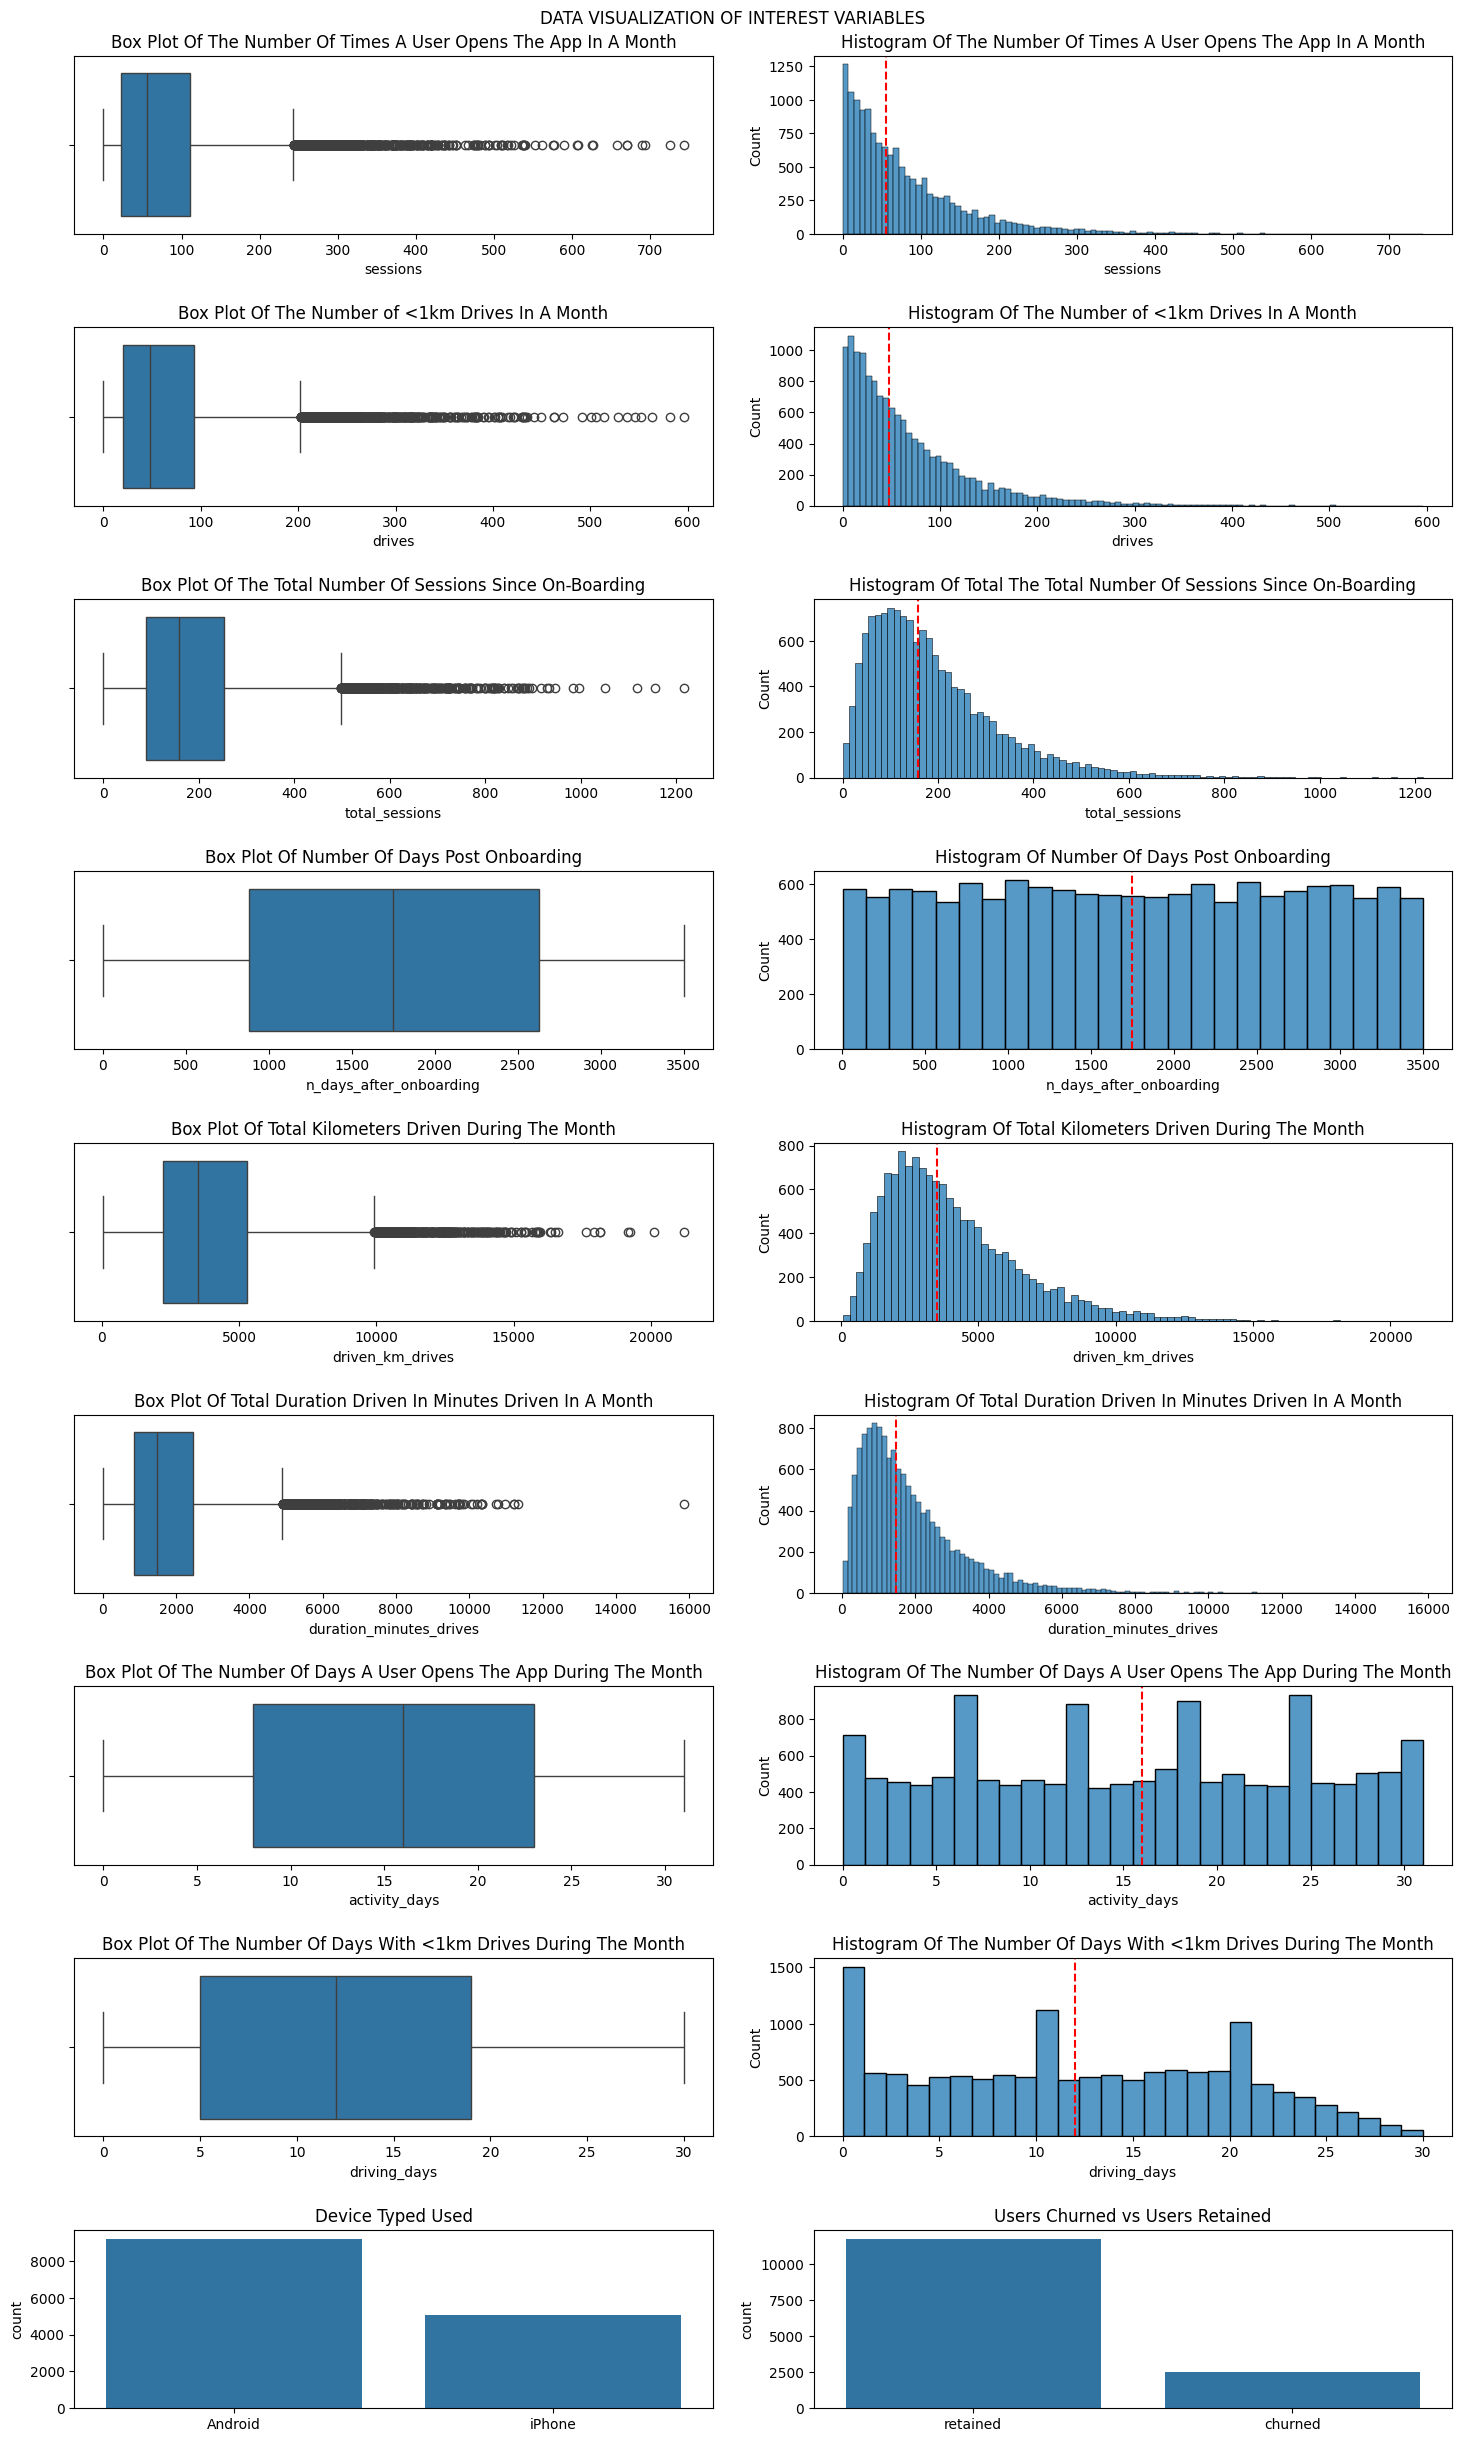

In [3]:
#Settting up subplots
fig, ax = plt.subplots(9,2,figsize=(15,25))
plt.suptitle("DATA VISUALIZATION OF INTEREST VARIABLES")

#Generating vusializations
sns.boxplot(x=df["sessions"],ax=ax[0,0]) #Number of times a user open the app in a month
sns.histplot(x=df["sessions"], ax=ax[0,1])
sns.boxplot(x=df["drives"], ax=ax[1,0]) #Number of <1km drives in a month 
sns.histplot(x=df["drives"], ax=ax[1,1]) 
sns.boxplot(x=df["total_sessions"], ax=ax[2,0]) #Number of sessions since on boarding
sns.histplot(x=df["total_sessions"], ax=ax[2,1])
sns.boxplot(x=df["n_days_after_onboarding"], ax=ax[3,0]) #Number of days since user singed up
sns.histplot(x=df["n_days_after_onboarding"], ax=ax[3,1]) 
sns.boxplot(x=df["driven_km_drives"], ax=ax[4,0]) #Total kilometers driven during the month
sns.histplot(x=df["driven_km_drives"], ax=ax[4,1])
sns.boxplot(x=df["duration_minutes_drives"], ax=ax[5,0]) #Total duration driven in minutes during the month
sns.histplot(x=df["duration_minutes_drives"], ax=ax[5,1])
sns.boxplot(x=df["activity_days"], ax=ax[6,0]) #Number of days user opens the app during the month
sns.histplot(x=df["activity_days"], ax=ax[6,1])
sns.boxplot(x=df["driving_days"], ax=ax[7,0]) # Number of days with <1km drives during the month
sns.histplot(x=df["driving_days"], ax=ax[7,1])
sns.barplot(x=df['device'].unique(),y=df['device'].value_counts(), ax=ax[8,0]) #Type of Device used to starts
sns.barplot(x=df['label'].unique(),y=df['label'].value_counts(), ax=ax[8,1]) #Users Churned vs Users Retained

#Labeling median values in histgram visualizations
ax[0,1].axvline(df["sessions"].median(), color='red', linestyle='--')
ax[1,1].axvline(round(df["drives"].median(),1), color='red', linestyle='--')
ax[2,1].axvline(round(df["total_sessions"].median(),1), color='red', linestyle='--')
ax[3,1].axvline(round(df["n_days_after_onboarding"].median(),1), color='red', linestyle='--')
ax[4,1].axvline(round(df["driven_km_drives"].median(),1), color='red', linestyle='--')
ax[5,1].axvline(round(df["duration_minutes_drives"].median(),1), color='red', linestyle='--')
ax[6,1].axvline(round(df["activity_days"].median(),1), color='red', linestyle='--')
ax[7,1].axvline(round(df["driving_days"].median(),1), color='red', linestyle='--')

#Labeling visualizations
ax[0,0].set_title("Box Plot Of The Number Of Times A User Opens The App In A Month")
ax[0,1].set_title("Histogram Of The Number Of Times A User Opens The App In A Month")
ax[1,0].set_title("Box Plot Of The Number of <1km Drives In A Month")
ax[1,1].set_title("Histogram Of The Number of <1km Drives In A Month")
ax[2,0].set_title("Box Plot Of The Total Number Of Sessions Since On-Boarding")
ax[2,1].set_title("Histogram Of Total The Total Number Of Sessions Since On-Boarding")
ax[3,0].set_title("Box Plot Of Number Of Days Post Onboarding")
ax[3,1].set_title("Histogram Of Number Of Days Post Onboarding")
ax[4,0].set_title("Box Plot Of Total Kilometers Driven During The Month")
ax[4,1].set_title("Histogram Of Total Kilometers Driven During The Month")
ax[5,0].set_title("Box Plot Of Total Duration Driven In Minutes Driven In A Month")
ax[5,1].set_title("Histogram Of Total Duration Driven In Minutes Driven In A Month")
ax[6,0].set_title("Box Plot Of The Number Of Days A User Opens The App During The Month")
ax[6,1].set_title("Histogram Of The Number Of Days A User Opens The App During The Month")
ax[7,0].set_title("Box Plot Of The Number Of Days With <1km Drives During The Month")
ax[7,1].set_title("Histogram Of The Number Of Days With <1km Drives During The Month")
ax[8,0].set_title("Device Typed Used")
ax[8,1].set_title("Users Churned vs Users Retained")
plt.tight_layout(pad=2)

## <u>FIRST OBJECTIVE</u>
Conduct A T-Test To Analyze THe Difference In The Mean Amount Of Rides Between Android Users And iPhone Users.

In [4]:
#Generating mean of device types
df.groupby('device')['drives'].mean()

device
Android    66.024241
iPhone     67.933225
Name: drives, dtype: float64

### HYPOTHESIS  
**NULL HYPOTHESIS:** There is **NO** Difference In The Average  Rides Between *Android Users* And *iPhone users*.

**ALTERNATE HYPOTHESIS:** There is **A** Difference In The Average  Rides Between *Android Users* And *iPhone users*.

In [5]:
#Generating a device type column
df["device_type"] = df["device"]
df.loc[df["device_type"] == "Android", "device_type"] = 2
df.loc[df["device_type"] == "iPhone", "device_type"] = 1

# Defining variables
Android = df[df["device_type"] == 2]['drives']
iPhone = df[df["device_type"] == 1]['drives']

#Performing t-test
sta, pvalue = stats.ttest_ind(a=Android, b=iPhone, equal_var=False)

#Interpretation and insight
print('\nINTERPRETATION: \nThe p-value is {} which is greater than 0.05. Hence, the null hypothesis is failed to be rejected. \nMeaning there is no statitical significance.'.
      format(pvalue))


INTERPRETATION: 
The p-value is 0.09365074661708836 which is greater than 0.05. Hence, the null hypothesis is failed to be rejected. 
Meaning there is no statitical significance.


### INSIGHT
Drivers who use iPhone devices on average have a similar number of drives as those who use Android

## <u>SECOND OBJECTIVE</u>
Build A Logistic Regression Model To Predict User Churn  
1. [X] Feature Engineering (`km_per_driving_day` & `professional_driver`) and Encode Categorical Variables
2. [X] Impute Outliers
3. [X] Check For Collinearity Via A Correlation Matrix
4. [X] Engineer And Evaluate A Logistic Regression Model

### FEATURE ENGINEERING AND VARIABLE ENCODING

In [6]:
#Generating a km_per_driving_day column
df["km_per_driving_day"] = df["driven_km_drives"] / df["driving_days"]
df.loc[df["km_per_driving_day"] == np.inf, "km_per_driving_day"] = 0 #Converting infinate values to zero

#Generating a professsional_driver column
df["professional_driver"] = np.where((df["drives"] >= 60) & (df["driving_days"] >= 15), 1, 0)
print(df["professional_driver"].value_counts(normalize=True)) #Count of professional and non-professionals
print('\n',df.groupby(df["professional_driver"])[["label"]].value_counts(normalize=True)) #Churn rate per professional staus 

#Encoding categorical variables
df["label"] = np.where(df["label"] == 'churned', 1, 0) #Churned=1, retained=0
df["device"] = np.where(df["device"] == 'Android', 0, 1) #Android=0, iPhone=1 

#Preview of created and encoded columns
df[["label","device","professional_driver","km_per_driving_day"]].head(5)

professional_driver
0    0.826002
1    0.173998
Name: proportion, dtype: float64

 professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: proportion, dtype: float64


,label,device,professional_driver,km_per_driving_day
0,0,0,1,138.360267
1,0,1,0,1246.901868
2,0,0,0,382.393602
3,0,1,0,304.530374
4,0,0,1,219.455667


###  IMPUTE OUTLIERS

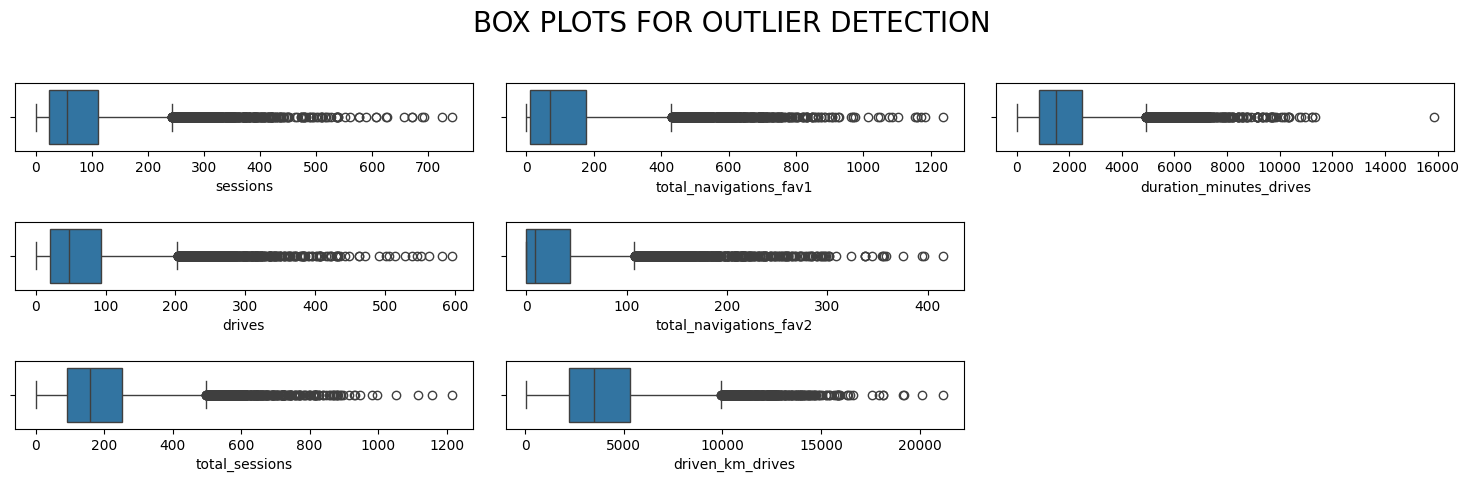

In [7]:
#Settig up subplots
fig, ax = plt.subplots(3,3,figsize=(15,5))
plt.suptitle("BOX PLOTS FOR OUTLIER DETECTION", fontsize=20)

#Generating vusializations
sns.boxplot(x=df["sessions"], ax=ax[0,0]) #Number of times a user open the app in a month
sns.boxplot(x=df["total_navigations_fav1"], ax=ax[0,1])
sns.boxplot(x=df["duration_minutes_drives"], ax=ax[0,2]) #Total duration driven in minutes during the month
sns.boxplot(x=df["drives"], ax=ax[1,0]) #Number of <1km drives in a month 
sns.boxplot(x=df["total_navigations_fav2"], ax=ax[1,1])  
sns.boxplot(x=df["total_sessions"], ax=ax[2,0]) #Number of sessions since on boarding
sns.boxplot(x=df["driven_km_drives"], ax=ax[2,1]) #Total kilometers driven during the month

#Disabling axes
ax[1,2].axis('off')
ax[2,2].axis('off')
plt.tight_layout(pad=2)

In [8]:
#Imputing outliers
for col in ["sessions", "total_navigations_fav1","drives", "total_navigations_fav2",
            "total_sessions","driven_km_drives", "duration_minutes_drives"]:
    threshold = df[col].quantile(0.95)
    df.loc[df[col] > threshold, col] = threshold

#Descriptive statistics of imputed columns
df[["sessions", "total_navigations_fav1","drives", "total_navigations_fav2",
    "total_sessions","driven_km_drives", "duration_minutes_drives"]].describe()

,sessions,total_navigations_fav1,drives,total_navigations_fav2,total_sessions,driven_km_drives,duration_minutes_drives
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,114.562767,63.964683,27.187216,183.717304,3944.558631,1792.911210
std,67.243178,124.378550,55.127927,36.715302,118.720520,2218.358258,1224.329759
min,0.000000,0.000000,0.000000,0.000000,0.220211,60.441250,18.282082
25%,23.000000,10.000000,20.000000,0.000000,90.457733,2217.319909,840.181344
50%,56.000000,71.000000,48.000000,9.000000,158.718571,3496.545617,1479.394387
75%,111.000000,178.000000,93.000000,43.000000,253.540450,5299.972162,2466.928876
max,243.000000,422.000000,200.000000,124.000000,455.439492,8898.716275,4668.180092


### CORRELATION MATRIX

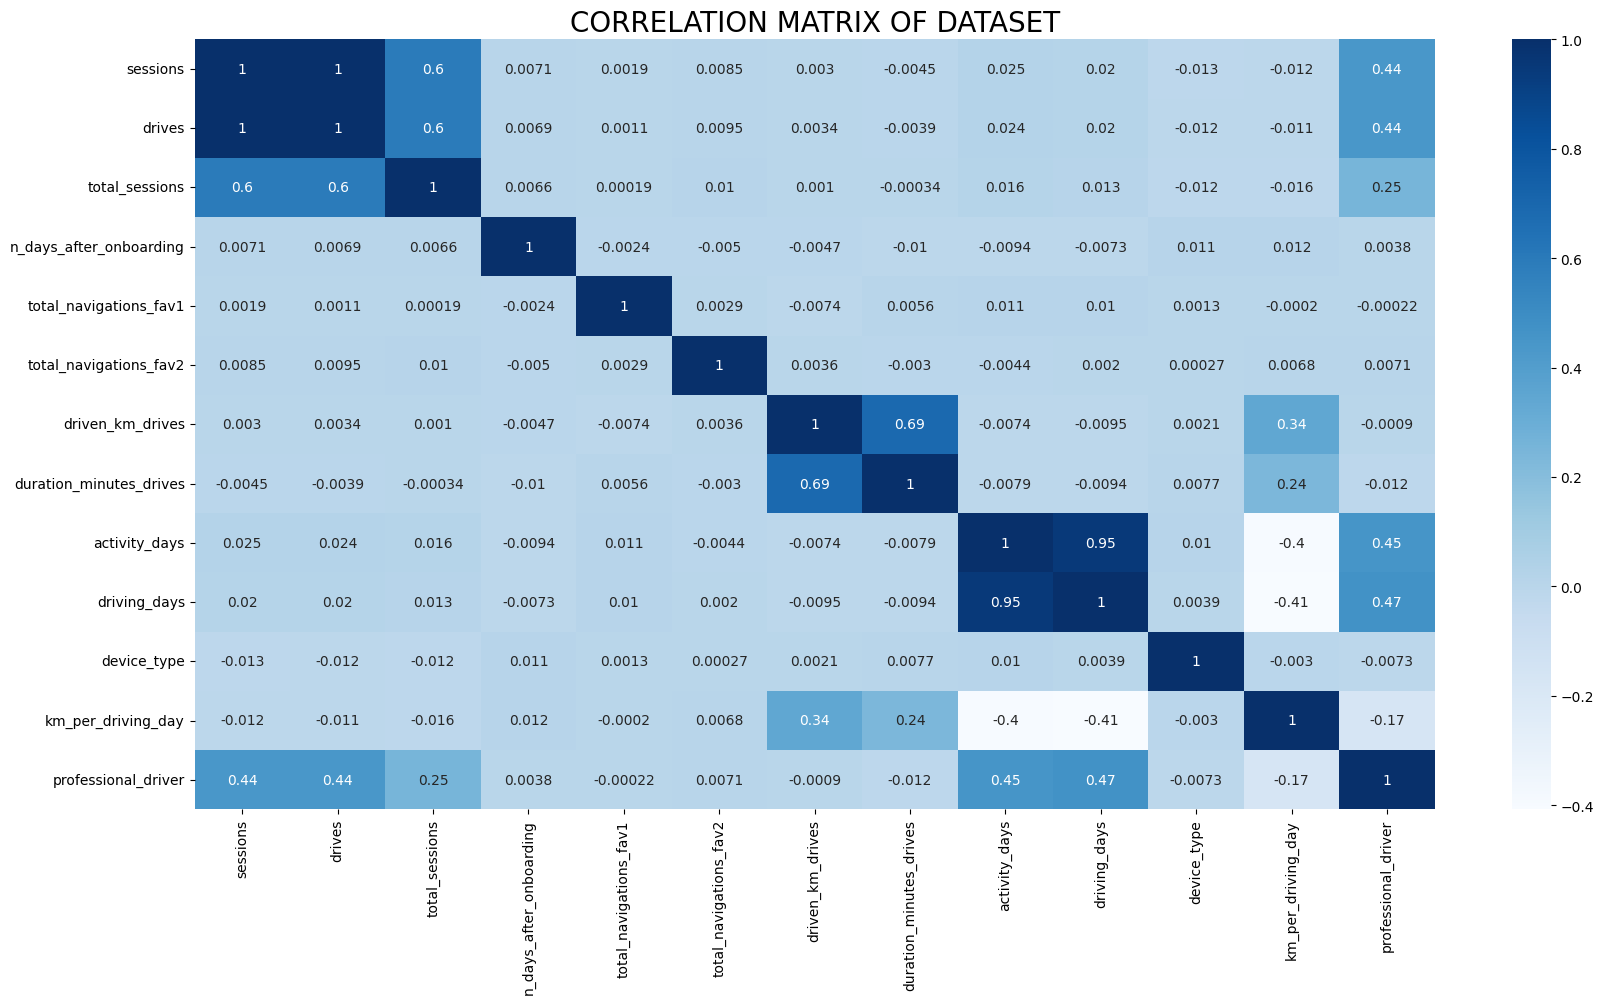

In [9]:
#Generating a correlation matrix
df1 = df.drop(columns=["label","ID","device"])
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(method='pearson'), annot=True, cmap='Blues') #Generating vusialization
plt.title("CORRELATION MATRIX OF DATASET", fontsize=20)
plt.show()

### LOGISTIC REGRESSION MODEL

In [10]:
#Define X and y variables
y = df["label"]
X = df.drop(columns=df[["label","sessions","ID","driving_days"]])

#Defining training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y, random_state=42)

#Generating dataframe for split
split = pd.DataFrame(data={"Dimensions":[X_train.shape, X_test.shape, y_train.size, y_test.size]},
                     index=["X Train","X Test","Y Train","Y Test"])

#Previewing split
split

,Dimensions
X Train,"(10724, 12)"
X Test,"(3575, 12)"
Y Train,10724
Y Test,3575


In [11]:
#Initializing model
log_mod = LogisticRegression(max_iter=2100, random_state=42).fit(X_train,y_train)

#Generating Preictions
y_pred = log_mod.predict(X_test)

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### MODEL EVALUATION

In [12]:
#Generating dataframe for results
results = pd.DataFrame(data={"Accuracy":f"{round((accuracy_score(y_test, y_pred)*100),0)} %",
                            "Precision":f"{round((precision_score(y_test, y_pred)*100),0)} %",
                            "Recall":f"{round((recall_score(y_test, y_pred)*100),0)} %",
                            "F1 Score":f"{round((f1_score(y_test, y_pred)*100),0)} %",
                            "ROC AUC":f"{round((roc_auc_score(y_test, y_pred)*100),0)} %"},
                      index=["LOGISTIC REGRESSION"])
#Previewing results
results

,Accuracy,Precision,Recall,F1 Score,ROC AUC
LOGISTIC REGRESSION,82.0 %,53.0 %,9.0 %,16.0 %,54.0 %


In [13]:
#Creating a dataframe for model coefficients
coeff = pd.DataFrame(data={"Feature Name": log_mod.feature_names_in_ ,"Model Coefficients":log_mod.coef_[0]})
coeff = coeff.sort_values(by=["Model Coefficients"], ascending=True, ignore_index=True)
coeff

,Feature Name,Model Coefficients
0,activity_days,-0.104992
1,device_type,-0.025298
2,professional_driver,-0.016571
3,device,-0.008700
4,n_days_after_onboarding,-0.000400
5,driven_km_drives,-0.000012
6,km_per_driving_day,0.000020
7,duration_minutes_drives,0.000110
8,total_sessions,0.000370
9,total_navigations_fav2,0.001013


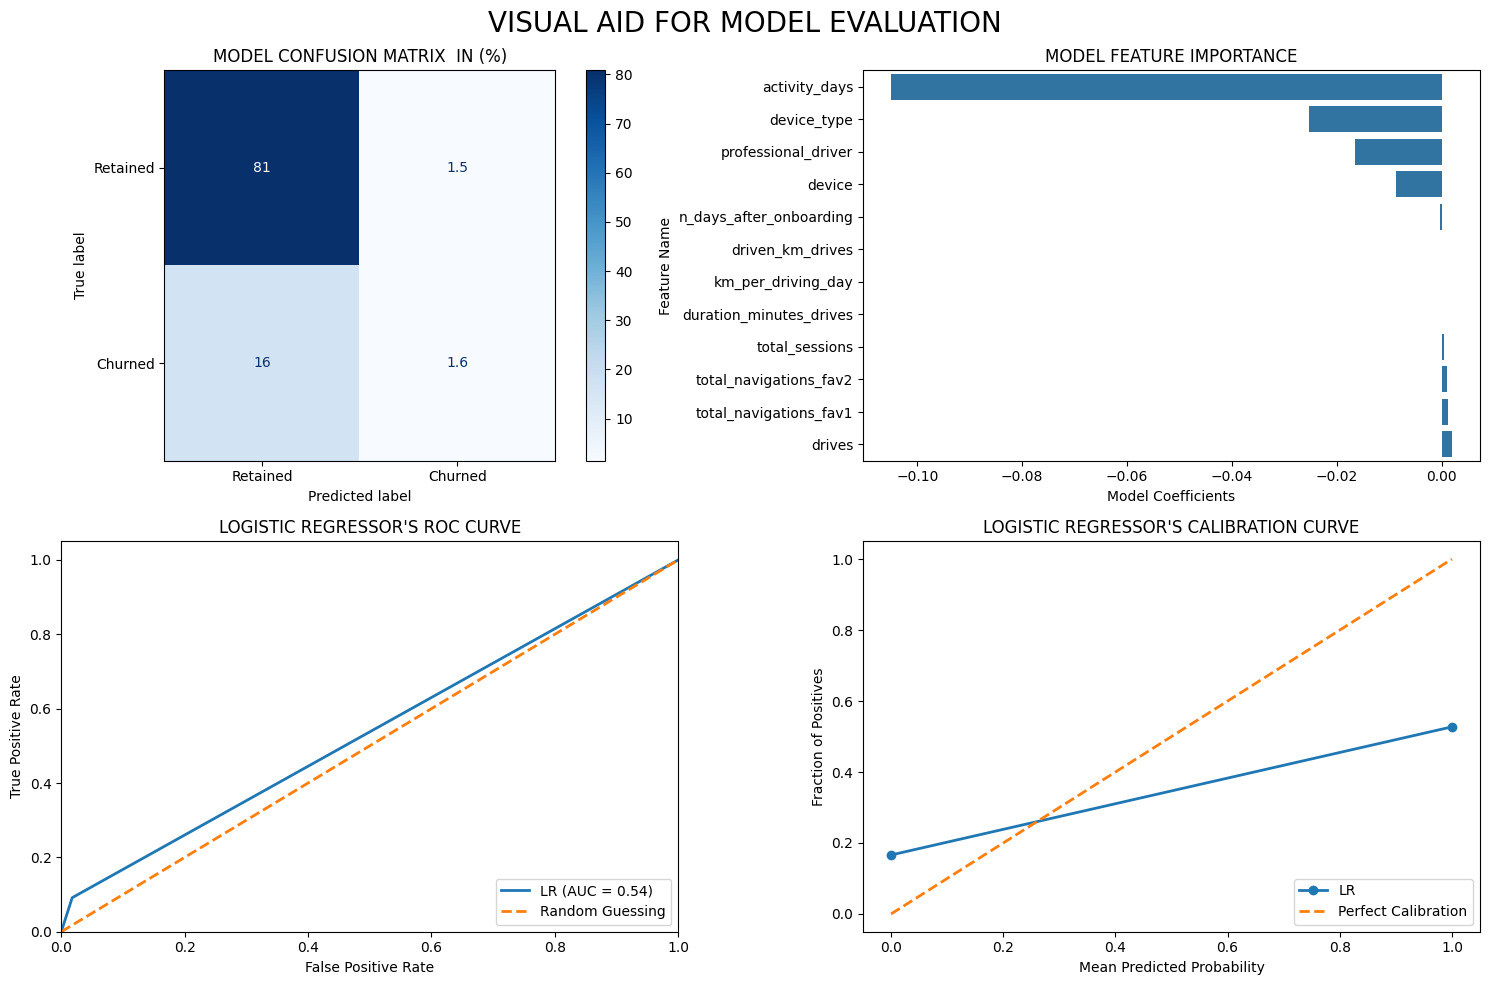

In [14]:
# ROC-AUC for Model
LR_fpr, LR_tpr, _ = roc_curve(y_test, y_pred)
LR_roc_auc = auc(LR_fpr, LR_tpr)

# Calibration Curve for Model
LR_prob_true, LR_prob_pred = calibration_curve(y_test, y_pred, n_bins=10)

#Generating subplots
fig, ax = plt.subplots(2,2,figsize=(15,10))
plt.suptitle("VISUAL AID FOR MODEL EVALUATION", fontsize=20)

#Generating vusializations
ConfusionMatrixDisplay(confusion_matrix=
                       confusion_matrix(y_test,y_pred, normalize="all")*100,
                       display_labels=
                       ["Retained","Churned"]).plot(cmap='Blues', ax=ax[0,0])
ax[0,0].set_title("MODEL CONFUSION MATRIX  IN (%)")

sns.barplot( data=coeff,
            x='Model Coefficients',
            y='Feature Name',
            orient='h',
            ax=ax[0,1])
ax[0,1].set_title("MODEL FEATURE IMPORTANCE")

# ROC-AUC Plot for model
ax[1,0].plot(LR_fpr, LR_tpr, lw=2, label='LR (AUC = %0.2f)' % LR_roc_auc)
ax[1,0].plot([0, 1], [0, 1], lw=2, linestyle='--', label='Random Guessing')
ax[1,0].set_xlim([0.0, 1.0])
ax[1,0].set_ylim([0.0, 1.05])
ax[1,0].set_xlabel('False Positive Rate')
ax[1,0].set_ylabel('True Positive Rate')
ax[1,0].set_title("LOGISTIC REGRESSOR'S ROC CURVE")
ax[1,0].legend(loc="lower right")

# Calibration Curve Plot for model
ax[1,1].plot(LR_prob_pred, LR_prob_true, marker='o', linewidth=2, label='LR')
ax[1,1].plot([0, 1], [0, 1],lw=2, linestyle='--', label='Perfect Calibration')
ax[1,1].set_xlabel('Mean Predicted Probability')
ax[1,1].set_ylabel('Fraction of Positives')
ax[1,1].set_title("LOGISTIC REGRESSOR'S CALIBRATION CURVE")
ax[1,1].legend(loc="lower right")

plt.tight_layout()

## <u>THIRD OBJECTIVE</u>
1. [X] Feature Engineering:  
    1. `percent_sessions_in_last_month`
    2. `total_sessions_per_day`
    3. `km_per_hour`
    4. `km_per_drive`
    5. `percent_of_Sessions_to_favorite`
2. [X] Split Training Data Into Training, Validation And Testing Sets
3. [X] Engineer Multiple Classification Models

### FEATURE ENGINEERING

In [15]:
#Generating percent_sessions_in_last_month
df["percent_sessions_in_last_month"] = df["sessions"] / df["total_sessions"]

#Generating total_sessions_per_day
df["total_sessions_per_day"] = df["total_sessions"] / df["n_days_after_onboarding"]

#Generating km_per_hour
df["km_per_hour"] = df["driven_km_drives"] / (df["duration_minutes_drives"] / 60)

#Generating km_per_drive
df["km_per_drive"] = df["driven_km_drives"] / df["drives"] 
df.loc[df["km_per_drive"] == np.inf, "km_per_drive"] = 0 #Converting infinity value to zero

#Generating percent_of_sessions to favorite
df["percent_of_sessions_to_favorite"] = (df["total_navigations_fav1"] + df["total_navigations_fav2"]) / df["total_sessions"]

#Generate previews of engineered columns
print(df[["percent_sessions_in_last_month",
          "total_sessions_per_day",
          "km_per_hour", "km_per_drive",
          "percent_of_sessions_to_favorite"]].info())

df[["percent_sessions_in_last_month",
    "total_sessions_per_day",
    "km_per_hour",
    "km_per_drive",
    "percent_of_sessions_to_favorite"]].describe()

<class 'pandas.core.frame.DataFrame'>
Index: 14299 entries, 0 to 14998
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   percent_sessions_in_last_month   14299 non-null  float64
 1   total_sessions_per_day           14299 non-null  float64
 2   km_per_hour                      14299 non-null  float64
 3   km_per_drive                     14299 non-null  float64
 4   percent_of_sessions_to_favorite  14299 non-null  float64
dtypes: float64(5)
memory usage: 670.3 KB
None


,percent_sessions_in_last_month,total_sessions_per_day,km_per_hour,km_per_drive,percent_of_sessions_to_favorite
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,0.444061,0.330082,189.457762,225.825460,1.575245
std,0.278497,1.292477,327.519818,572.543937,8.243641
min,0.000000,0.000298,72.013095,0.000000,0.000000
25%,0.200241,0.050818,92.887853,32.910489,0.212409
50%,0.427865,0.100457,121.231277,72.325946,0.647726
75%,0.665012,0.208580,191.157779,177.431844,1.593733
max,1.530637,39.763874,21822.419685,8898.716275,668.888397


### MODEL PREP

In [16]:
#Define X and y variables
y = df["label"]
X = df.drop(columns=df[["label", "ID","device_type"]])

#Defining training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.20,
                                                    random_state=42)


#Generating dataframe for split
split2 = pd.DataFrame(data={"Dimensions":[X_train.shape, 
                                          X_test.shape,
                                          y_train.size, 
                                          y_test.size]}, 
                      index=["X Train", "X Test", "Y Train", "Y Test"])

#Previewing split
split2

,Dimensions
X Train,"(11439, 18)"
X Test,"(2860, 18)"
Y Train,11439
Y Test,2860


In [17]:
# Initialize empty lists to store results
Model = []
Accuracy = []
Precision = []
F1 = []
Recall = []
ROC_AUC = []

# Generating function to store and display results
def resultify(name_or_results, test=None, pred=None):
    """
    Processes results if test and pred are provided, 
    or displays results if passed with no additional arguments.
    """
    
    # If called with no test/pred arguments, display the results DataFrame
    if test is None and pred is None:
        return pd.DataFrame(
            data={'Accuracy': Accuracy,
                  'Precision': Precision,
                  'Recall': Recall,
                  'F1': F1,
                  'ROC AUC': ROC_AUC},
            index=Model
        )
    
    # Ensure all required arguments are provided for result processing
    if not (test is None or pred is None):
        # Generate evaluation scores
        accuracy_value = round(accuracy_score(test, pred) * 100, 0)
        precision_value = round(precision_score(test, pred) * 100, 0)
        recall_value = round(recall_score(test, pred) * 100, 0)
        f1_value = round(f1_score(test, pred) * 100, 0)
        roc_auc_value = round(roc_auc_score(test, pred) * 100, 0)
        
        # Append values to lists
        Model.append(name_or_results)
        Accuracy.append(f"{accuracy_value}%")
        Precision.append(f"{precision_value}%")
        Recall.append(f"{recall_value}%")
        F1.append(f"{f1_value}%")
        ROC_AUC.append(f"{roc_auc_value}%")

### INITIALIZING CLASSIFIERS 

In [18]:
#Initializing first base classifier
rfc = RandomForestClassifier(random_state=42).fit(X_train, y_train) #Training first classifier

#Initializing second base classifier
gbc = GradientBoostingClassifier(random_state=42).fit(X_train, y_train) #Training second classifier

#Initializing third base classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42).fit(X_train, y_train) #Training third classifier

print("CLASSIFIERS READY")

CLASSIFIERS READY


### MODEL PREDICTIONS

In [19]:
#Generating predictions
rfc_pred = rfc.predict(X_test)
resultify("RANDOM FOREST Test", y_test, rfc_pred) #Applying resultify

#Generating predictions
gbc_pred = gbc.predict(X_test)
resultify("GRADIENT BOOSTING Test", y_test, gbc_pred) #Applying resultify

#Generating predictions
xgb_pred = xgb.predict(X_test)
resultify("X GRADIENT BOOSTING Test", y_test, xgb_pred) #Applying resultify

### MODELS' RESULTS

In [20]:
#Displaying results
resultify('results')

,Accuracy,Precision,Recall,F1,ROC AUC
RANDOM FOREST Test,82.0%,51.0%,12.0%,20.0%,55.0%
GRADIENT BOOSTING Test,82.0%,52.0%,10.0%,17.0%,54.0%
X GRADIENT BOOSTING Test,80.0%,38.0%,17.0%,24.0%,56.0%


### CONFUSION MATRICES

In [21]:
#Defining validation confusion matricies 
rfc_cm = confusion_matrix(y_test, rfc_pred, normalize="all")*100
gbc_cm = confusion_matrix(y_test, gbc_pred, normalize="all")*100
xgb_cm = confusion_matrix(y_test, xgb_pred, normalize="all")*100

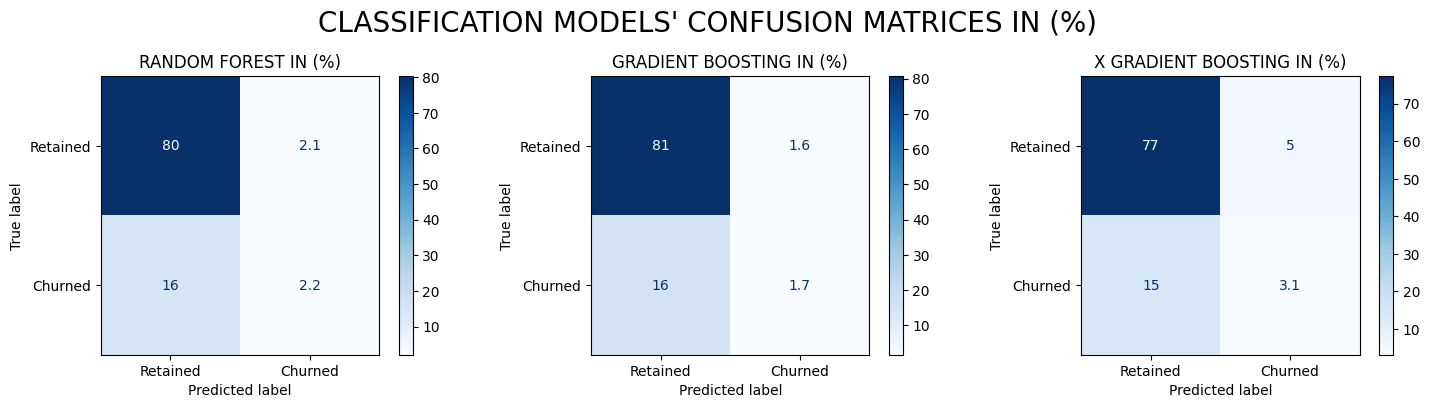

In [22]:
#Generating subplots
fig, ax = plt.subplots(1,3, figsize=(15,4))
plt.suptitle("CLASSIFICATION MODELS' CONFUSION MATRICES IN (%)", fontsize=20)

#Generating vusializations
ConfusionMatrixDisplay(confusion_matrix=rfc_cm, display_labels=['Retained', 'Churned']).plot(cmap='Blues', ax=ax[0])
ConfusionMatrixDisplay(confusion_matrix=gbc_cm, display_labels=['Retained', 'Churned']).plot(cmap='Blues', ax=ax[1])
ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=['Retained', 'Churned']).plot(cmap='Blues', ax=ax[2])

#Labelling subplots
ax[0].set_title("RANDOM FOREST IN (%)")
ax[1].set_title("GRADIENT BOOSTING IN (%)")
ax[2].set_title("X GRADIENT BOOSTING IN (%)")
plt.tight_layout(pad=1.5)

### ROC-AUC AND CALIBRATION CURVE

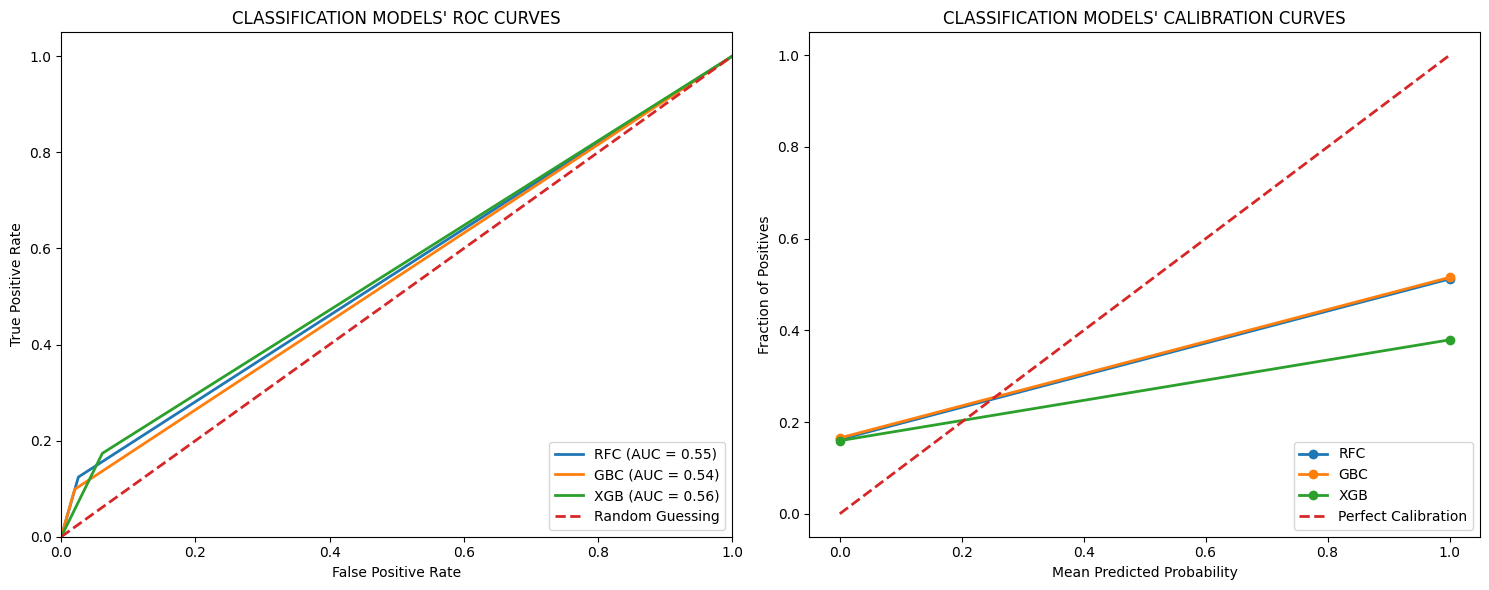

In [23]:
# ROC-AUC for Model 1
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_pred)
rfc_roc_auc = auc(rfc_fpr, rfc_tpr)

# ROC-AUC for Model 2
gbc_fpr, gbc_tpr, _ = roc_curve(y_test, gbc_pred)
gbc_roc_auc = auc(gbc_fpr, gbc_tpr)

# ROC-AUC for Model 3
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_pred)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

# Calibration Curve for Model 1
rfc_prob_true, rfc_prob_pred = calibration_curve(y_test, rfc_pred, n_bins=10)

# Calibration Curve for Model 2
gbc_prob_true, gbc_prob_pred = calibration_curve(y_test, gbc_pred, n_bins=10)

# Calibration Curve for Model 3
xgb_prob_true, xgb_prob_pred = calibration_curve(y_test, xgb_pred, n_bins=10)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# ROC-AUC Plot for all models
axes[0].plot(rfc_fpr, rfc_tpr, lw=2, label='RFC (AUC = %0.2f)' % rfc_roc_auc)
axes[0].plot(gbc_fpr, gbc_tpr, lw=2, label='GBC (AUC = %0.2f)' % gbc_roc_auc)
axes[0].plot(xgb_fpr, xgb_tpr, lw=2, label='XGB (AUC = %0.2f)' % xgb_roc_auc)
axes[0].plot([0, 1], [0, 1], lw=2, linestyle='--', label='Random Guessing')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title("CLASSIFICATION MODELS' ROC CURVES")
axes[0].legend(loc="lower right")

# Calibration Curve Plot for all models
axes[1].plot(rfc_prob_pred, rfc_prob_true, marker='o', linewidth=2, label='RFC')
axes[1].plot(gbc_prob_pred, gbc_prob_true, marker='o', linewidth=2, label='GBC')
axes[1].plot(xgb_prob_pred, xgb_prob_true, marker='o', linewidth=2, label='XGB')
axes[1].plot([0, 1], [0, 1],lw=2, linestyle='--', label='Perfect Calibration')
axes[1].set_xlabel('Mean Predicted Probability')
axes[1].set_ylabel('Fraction of Positives')
axes[1].set_title("CLASSIFICATION MODELS' CALIBRATION CURVES")
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

### FEATURE IMPORTANCE

In [24]:
# List of models and their names
models = [rfc, gbc, xgb]
model_names = ['rfc', 'gbc', 'xgb']

# Initialize an empty list to store the dataframes
dfs = []

# Loop through each model
for model, name in zip(models, model_names):
    # Get feature importances and indices
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    # Generate dataframe for feature importances
    df = pd.DataFrame(
        data={'Feature': [X.columns[i] for i in indices],
              'Importance': importances[indices]})
    
    # Append the dataframe to the list
    dfs.append(df)

# Assign the dataframes to variables
rfc_df, gbc_df, xgb_df = dfs

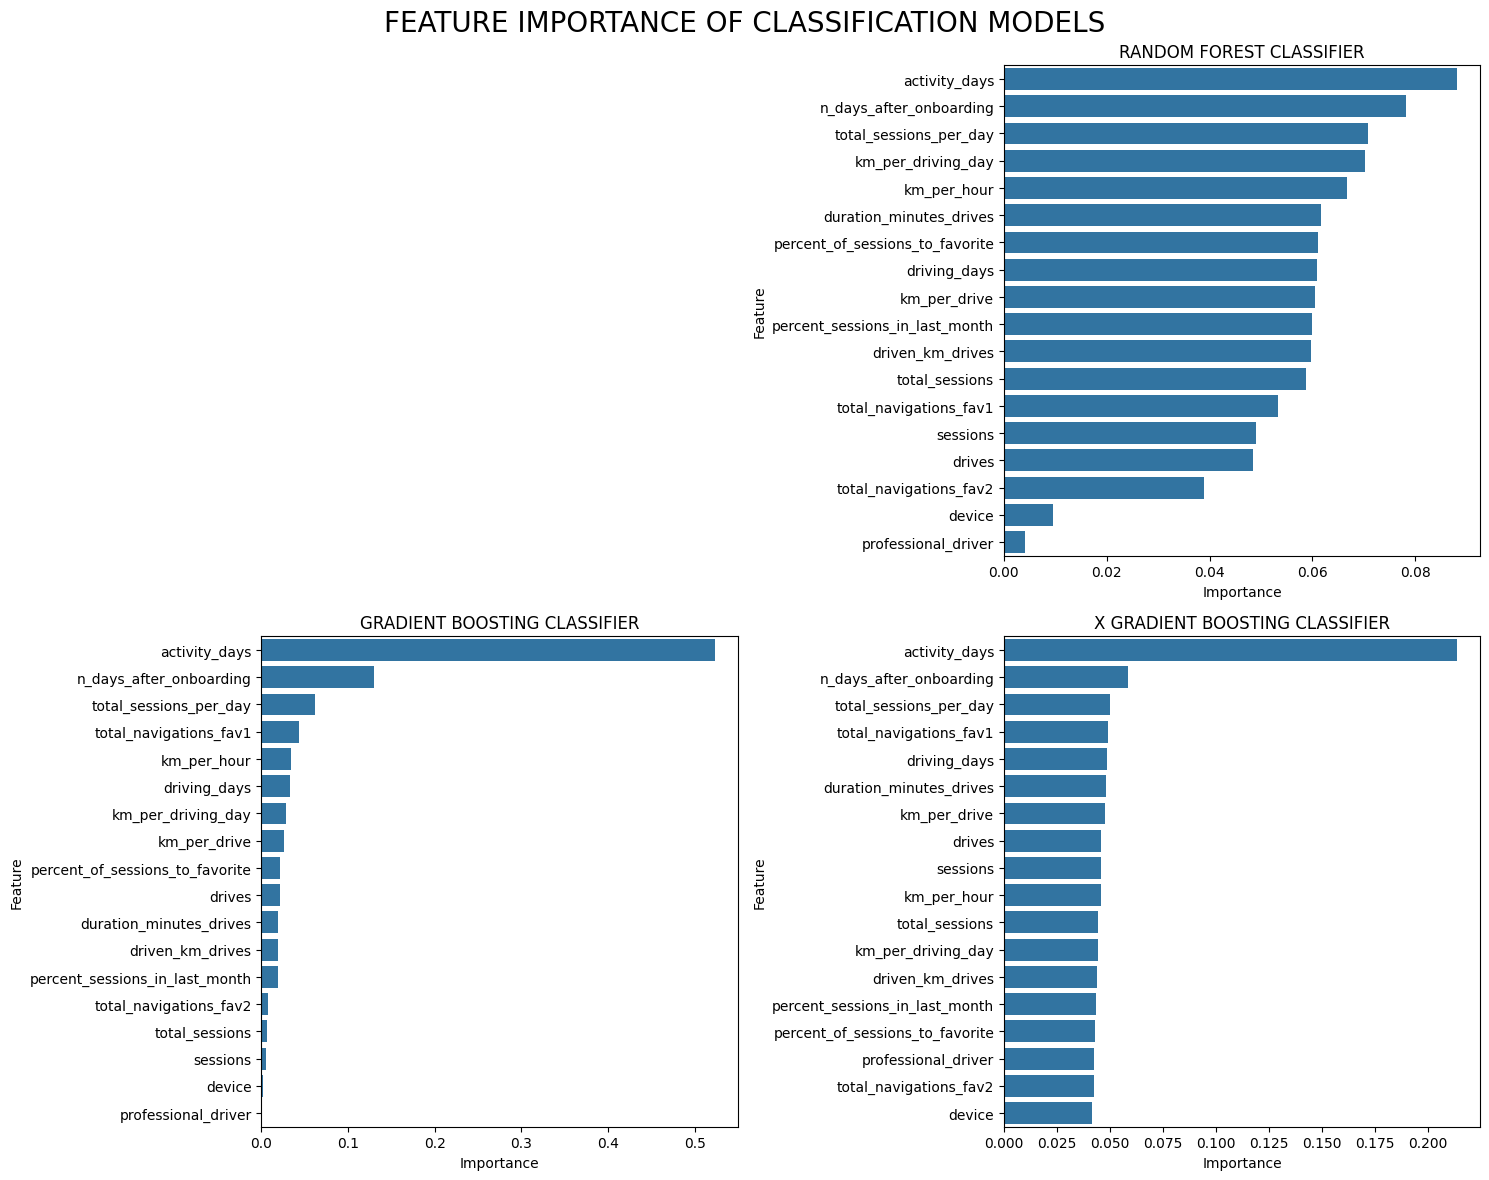

In [25]:
#Generating subplots
fig, ax = plt.subplots(2,2, figsize=(15,12))
plt.suptitle("FEATURE IMPORTANCE OF CLASSIFICATION MODELS", fontsize=20)

#Disabling axis
ax[0,0].axis('off')

#Generating vusializations
sns.barplot(data=rfc_df, y='Feature', x='Importance', ax=ax[0,1])
sns.barplot(data=gbc_df, y='Feature', x='Importance', ax=ax[1,0])
sns.barplot(data=xgb_df, y='Feature', x='Importance', ax=ax[1,1])

#Naming subplots
ax[0,1].set_title("RANDOM FOREST CLASSIFIER")
ax[1,0].set_title("GRADIENT BOOSTING CLASSIFIER")
ax[1,1].set_title("X GRADIENT BOOSTING CLASSIFIER")
plt.tight_layout()